# Data Source
- https://data.ec.gc.ca/data/substances/monitor/greenhouse-gas-reporting-program-ghgrp-facility-greenhouse-gas-ghg-data/?lang=en

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PDGES-GHGRP-GHGEmissionsGES-2004-Present.csv", encoding = "ISO-8859-1")

In [3]:
df.dtypes

GHG ID No. / No d'identification de GES                                                             object
Reference Year / Année de référence                                                                  int64
Facility Name / Nom de l'installation                                                               object
Facility Location / Emplacement de l'installation                                                   object
Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation     object
                                                                                                    ...   
C6F14 (tonnes CO2e / tonnes éq. CO2)                                                                 int64
PFC Total (tonnes CO2e / tonnes éq. CO2)                                                           float64
SF6 (tonnes)                                                                                       float64
SF6 (tonnes CO2e / tonnes éq. CO2)   

In [4]:
df.shape

(11331, 77)

In [5]:
df.head()

,GHG ID No. / No d'identification de GES,Reference Year / Année de référence,Facility Name / Nom de l'installation,Facility Location / Emplacement de l'installation,Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation,Facility Province or Territory / Province ou territoire de l'installation,Facility Postal Code / Code postal de l'installation,Latitude,Longitude,Facility NPRI ID / Numéro d'identification de l'INRP,...,C4F8 (tonnes),C4F8 (tonnes CO2e / tonnes éq. CO2),C5F12 (tonnes),C5F12 (tonnes CO2e / tonnes éq. CO2),C6F14 (tonnes),C6F14 (tonnes CO2e / tonnes éq. CO2),PFC Total (tonnes CO2e / tonnes éq. CO2),SF6 (tonnes),SF6 (tonnes CO2e / tonnes éq. CO2),Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)
0,G10001,2019,Division Alma,1100 Melanion Street West,Alma,Quebec,G8B 5W2,48.56500,-71.65556,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,8.756040e+04
1,G10003,2019,"Foothills Pipeline, Alberta",NaN,Airdrie,Alberta,T4A 2G7,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,4.145773e+05
2,G10004,2019,Kingston CoGen,5146 Taylor-Kidd Boulevard,Bath,Ontario,K0H 1G0,44.20950,-76.72460,5765.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,9.886037e+02
3,G10006,2019,Redwater Fertilizer Operations,56225 SH643,Sturgeon County,Alberta,T0A 2W0,53.84200,-113.09300,2134.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,1.241089e+06
4,G10007,2019,Alberta Envirofuels,9511 17 Street Northwest,Edmonton,Alberta,T6P 1Y3,53.53199,-113.36492,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,2.676638e+05


In [6]:
df.rename(columns = {"Reference Year / Année de référence": "Year",
         "Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)": "GHG",
         "GHG ID No. / No d'identification de GES": "ID",
          "English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais" : "Type",
                    "Facility Province or Territory / Province ou territoire de l'installation": "Province",
                    "Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation": "District"}, inplace=True)

In [7]:
df = df[["ID", "Year", "GHG", "Type", "Province", "District"]]
df.head()

,ID,Year,GHG,Type,Province,District
0,G10001,2019,8.756040e+04,Mechanical pulp mills,Quebec,Alma
1,G10003,2019,4.145773e+05,Pipeline transportation of natural gas,Alberta,Airdrie
2,G10004,2019,9.886037e+02,Fossil-fuel electric power generation,Ontario,Bath
3,G10006,2019,1.241089e+06,Chemical fertilizer (except potash) manufacturing,Alberta,Sturgeon County
4,G10007,2019,2.676638e+05,Petrochemical manufacturing,Alberta,Edmonton


In [8]:
df.isna().sum()

ID             0
Year           0
GHG            0
Type           0
Province       0
District    1004
dtype: int64

In [9]:
df.loc[df["District"].isnull() == True, :]

,ID,Year,GHG,Type,Province,District
108,G10139,2019,41889.85771,Oil and gas extraction (except oil sands),Alberta,NaN
125,G10158,2019,78648.54300,Oil and gas extraction (except oil sands),Alberta,NaN
182,G10235,2019,35514.38800,Oil and gas extraction (except oil sands),Alberta,NaN
243,G10312,2019,120170.38760,Oil and gas extraction (except oil sands),Alberta,NaN
259,G10338,2019,94694.14400,In-situ oil sands extraction,Saskatchewan,NaN
...,...,...,...,...,...,...
9583,G10561,2009,57607.78372,Conventional Oil and Gas Extraction,Alberta,NaN
9907,G10338,2008,102100.48380,Non-Conventional Oil Extraction,Saskatchewan,NaN
10272,G10338,2007,125301.08310,Non-Conventional Oil Extraction,Saskatchewan,NaN
10627,G10338,2006,115380.74030,Non-Conventional Oil Extraction,Saskatchewan,NaN


In [10]:
# Filling empty districts
df["District"].fillna(df["Province"], inplace = True)
df.isna().sum()

ID          0
Year        0
GHG         0
Type        0
Province    0
District    0
dtype: int64

In [11]:
df["Type"].unique()

array(['Mechanical pulp mills', 'Pipeline transportation of natural gas',
       'Fossil-fuel electric power generation',
       'Chemical fertilizer (except potash) manufacturing',
       'Petrochemical manufacturing', 'Chemical pulp mills',
       'Primary production of alumina and aluminum',
       'Iron and steel mills and ferro-alloy manufacturing',
       'Other electric power generation', 'Lime manufacturing',
       'Waste treatment and disposal',
       'Automobile and light-duty motor vehicle manufacturing',
       'Oil and gas extraction (except oil sands)',
       'Cement manufacturing',
       'Non-ferrous metal (except aluminum) smelting and refining',
       'Petroleum refineries',
       'All other basic inorganic chemical manufacturing',
       'Iron ore mining', 'Wet corn milling', 'Frozen food manufacturing',
       'In-situ oil sands extraction', 'Bituminous coal mining',
       'Other basic organic chemical manufacturing', 'Newsprint mills',
       'Natural gas dis

In [12]:
len(df["Province"].unique())

13

In [13]:
len(df["District"].unique())

883

# Facility Level Data

In [14]:
df["Treatment_Group"] = (df["Province"] == "Alberta") * 1


In [15]:
df.rename(columns = {"GHG": "Total_Emissions"}, inplace=True)

# Checking Facility Level Data for Common Trends

In [32]:
df3 = df.copy()
df3 = pd.concat([df3, pd.get_dummies(df3["Year"], prefix = "is", drop_first = True)],axis=1)
df3

,ID,Year,Total_Emissions,Type,Province,District,Treatment_Group,is_2005,is_2006,is_2007,...,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_2019
0,G10001,2019,8.756040e+04,Mechanical pulp mills,Quebec,Alma,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,G10003,2019,4.145773e+05,Pipeline transportation of natural gas,Alberta,Airdrie,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,G10004,2019,9.886037e+02,Fossil-fuel electric power generation,Ontario,Bath,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,G10006,2019,1.241089e+06,Chemical fertilizer (except potash) manufacturing,Alberta,Sturgeon County,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,G10007,2019,2.676638e+05,Petrochemical manufacturing,Alberta,Edmonton,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,G10323,2004,1.787137e+05,Fossil-Fuel Electric Power Generation,Ontario,Windsor,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11327,G10324,2004,1.455941e+06,Non-Conventional Oil Extraction,Alberta,Bonnyville,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11328,G10325,2004,1.037091e+05,Glass Manufacturing,Ontario,Owen Sound,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11329,G10326,2004,1.381902e+05,Conventional Oil and Gas Extraction,Alberta,Zama City,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
com_trend_test = 'Total_Emissions ~ Treatment_Group + Treatment_Group * is_2005+Treatment_Group * is_2006+Treatment_Group * is_2007+Treatment_Group * is_2008+Treatment_Group * is_2009+Treatment_Group * is_2010+Treatment_Group * is_2011+Treatment_Group * is_2012+Treatment_Group * is_2013+Treatment_Group * is_2014+ Treatment_Group * is_2015'

In [38]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = com_trend_test, data = df3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.14
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.84e-86
Time:                        18:24:40   Log-Likelihood:            -1.7392e+05
No. Observations:               11331   AIC:                         3.479e+05
Df Residuals:                   11307   BIC:                         3.481e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.917e+05   1.86e+04     10.333      0.000    1.55e+05    2.28e+05
Treatment_Group           1.12e+05   2.96e+04      3.781      0.000    5.39e+04     1.7e+05
is_2005                  5.271e+05   7.51e+04      7.019      0.000     3.8e+05    6.74e+05
Treatment_Group:is_2005  2.492e+05   1.37e+05      1.813      0.070   -2.03e+04    5.19e+05
is_2006                  4.615e+05   7.45e+04      6.194      0.000    3.15e+05    6.08e+05
Treatment_Group:is_2006  3.401e+05   1.35e+05      2.513      0.012    7.48e+04    6.05e+05
is_2007                  4.814e+05   7.41e+04      6.499      0.000    3.36e+05    6.27e+05
Treatment_Group:is_2007  2.753e+05   1.34e+05      2.058      0.040     1.3e+04    5.38e+05
is_2008                  4.444e+05   7.48e+04      5.941      0.000    2.98e+05    5.91e+05
Treatment_Group:is_2008   3.49e+05   1.33e+05      2.624      0.009    8.83e+04     6.1e+05
is_2009                  1.676e+05   6.08e+04      2.757      0.006    4.84e+04    2.87e+05
Treatment_Group:is_2009  2.622e+05    1.1e+05      2.388      0.017    4.69e+04    4.77e+05
is_2010                  1.789e+05   6.06e+04      2.954      0.003    6.02e+04    2.98e+05
Treatment_Group:is_2010  2.643e+05   1.09e+05      2.429      0.015     5.1e+04    4.78e+05
is_2011                   1.51e+05   6.01e+04      2.514      0.012    3.33e+04    2.69e+05
Treatment_Group:is_2011  3.103e+05   1.09e+05      2.842      0.004    9.63e+04    5.24e+05
is_2012                  1.432e+05   5.94e+04      2.412      0.016    2.68e+04     2.6e+05
Treatment_Group:is_2012  3.268e+05   1.08e+05      3.016      0.003    1.14e+05    5.39e+05
is_2013                  1.237e+05   5.86e+04      2.112      0.035    8897.472    2.39e+05
Treatment_Group:is_2013  3.474e+05   1.06e+05      3.263      0.001    1.39e+05    5.56e+05
is_2014                  1.211e+05   5.92e+04      2.046      0.041    5079.717    2.37e+05
Treatment_Group:is_2014  3.276e+05   1.04e+05      3.146      0.002    1.23e+05    5.32e+05
is_2015                  1.242e+05   5.98e+04      2.077      0.038    6974.834    2.41e+05
Treatment_Group:is_2015  3.474e+05   1.05e+05      3.308      0.001    1.42e+05    5.53e+05
==============================================================================
Omnibus:                    14705.490   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2536289.289
Skew:                           7.357   Prob(JB):                         0.00
Kurtosis:                      74.802   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying F test to check if coefficients are different from 0
- Null hypothesis: All dummy interaction terms are 0 
- Alternate hypothesis: At least one dummy interaction term != 0
- We want P > 0.05 to (fail to reject) to illustrate parallel trends

In [36]:
# Testing with F test
hypotheses = "Treatment_Group:is_2005=Treatment_Group:is_2006=Treatment_Group:is_2007=Treatment_Group:is_2008=Treatment_Group:is_2009=Treatment_Group:is_2010=Treatment_Group:is_2011=Treatment_Group:is_2012=Treatment_Group:is_2013=Treatment_Group:is_2014=Treatment_Group:is_2015 = 0"
hypotheses2 = "(Treatment_Group:is_2005=0),(Treatment_Group:is_2006=0),(Treatment_Group:is_2007=0),(Treatment_Group:is_2008=0),(Treatment_Group:is_2009=0),(Treatment_Group:is_2010=0),(Treatment_Group:is_2011=0),(Treatment_Group:is_2012=0),(Treatment_Group:is_2013=0),(Treatment_Group:is_2014=0),(Treatment_Group:is_2015=0)"
res.f_test(hypotheses)


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.492595292490382, p=8.255354498743337e-07, df_denom=1.13e+04, df_num=11>

# Running Classic DD

In [20]:
df3.groupby("Year").count()["ID"]

Year
2004     326
2005     337
2006     345
2007     351
2008     349
2009     537
2010     544
2011     548
2012     560
2013     579
2014     584
2015     572
2016     612
2017    1667
2018    1723
2019    1697
Name: ID, dtype: int64

# Scattering Alberta Facilities to Check for Trend

In [21]:
alberta_df = df.loc[df["Province"] == "Alberta", :]
alberta_df.head()

,ID,Year,Total_Emissions,Type,Province,District,Treatment_Group
1,G10003,2019,4.145773e+05,Pipeline transportation of natural gas,Alberta,Airdrie,1
3,G10006,2019,1.241089e+06,Chemical fertilizer (except potash) manufacturing,Alberta,Sturgeon County,1
4,G10007,2019,2.676638e+05,Petrochemical manufacturing,Alberta,Edmonton,1
5,G10008,2019,5.514012e+05,Pipeline transportation of natural gas,Alberta,Calgary,1
6,G10009,2019,1.495464e+05,Chemical pulp mills,Alberta,County of Athabasca,1


In [22]:
alberta_df.sort_values("Year", ascending = True, inplace = True)
alberta_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,Year,Total_Emissions,Type,Province,District,Treatment_Group
11329,G10326,2004,1.381902e+05,Conventional Oil and Gas Extraction,Alberta,Zama City,1
11077,G10073,2004,4.175884e+06,Non-Conventional Oil Extraction,Alberta,Bonnyville,1
11090,G10086,2004,3.135304e+05,Natural Gas Distribution,Alberta,Alberta,1
11099,G10095,2004,9.807150e+04,Waste Treatment and Disposal,Alberta,Calgary,1
11100,G10096,2004,1.869590e+05,Conventional Oil and Gas Extraction,Alberta,Crossfield,1
...,...,...,...,...,...,...,...
1200,G11645,2019,1.954153e+04,Oil and gas extraction (except oil sands),Alberta,Alberta,1
1199,G11644,2019,1.839978e+04,Oil and gas extraction (except oil sands),Alberta,Alberta,1
1198,G11643,2019,1.561120e+04,Oil and gas extraction (except oil sands),Alberta,Alberta,1
1206,G11652,2019,1.553653e+04,Oil and gas extraction (except oil sands),Alberta,Alberta,1


In [23]:
plt.figure(figsize=(16,5))
plt.scatter(alberta_df["Year"], alberta_df["GHG"])
plt.grid()

KeyError: 'GHG'

<Figure size 1152x360 with 0 Axes>

# Creating Groupbys for Year, Province using Summations and Means

In [24]:
gb_sum = df.groupby(["Province", "Year"]).sum().reset_index()
gb_mean = df.groupby(["Province", "Year"]).mean().reset_index()
# gb_p["GHG"].resample("Y", how = [np.sum, len])

# Plots for Group Summations and Group Means

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Summation of Total Facilities Emissions')]

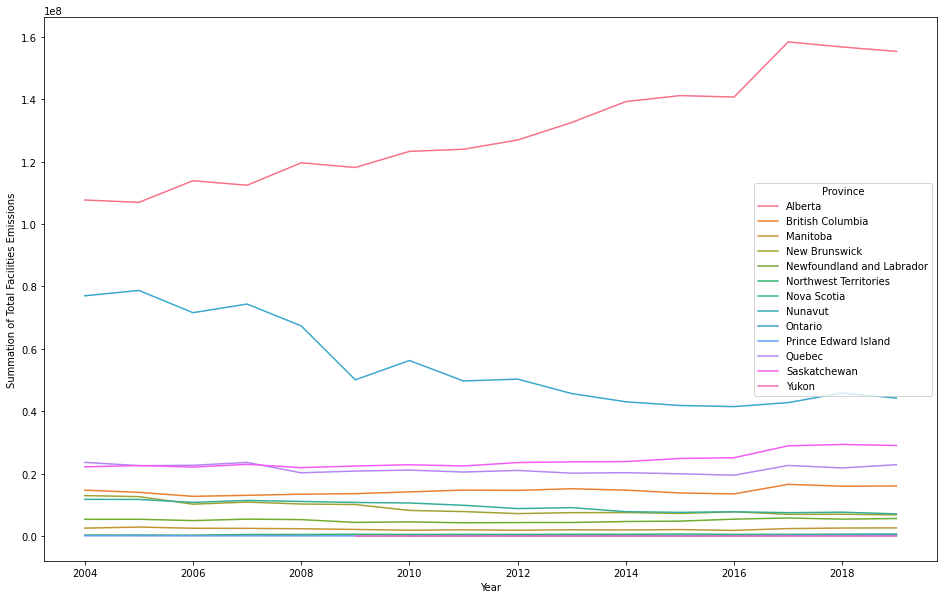

In [28]:
plt.figure(figsize = (16,10))

sns.lineplot(data = gb_sum, x = "Year", y = "Total_Emissions", hue = "Province", ci = None).set(xlabel = "Year", ylabel = "Summation of Total Facilities Emissions")

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Mean of Total Facilities Emissions')]

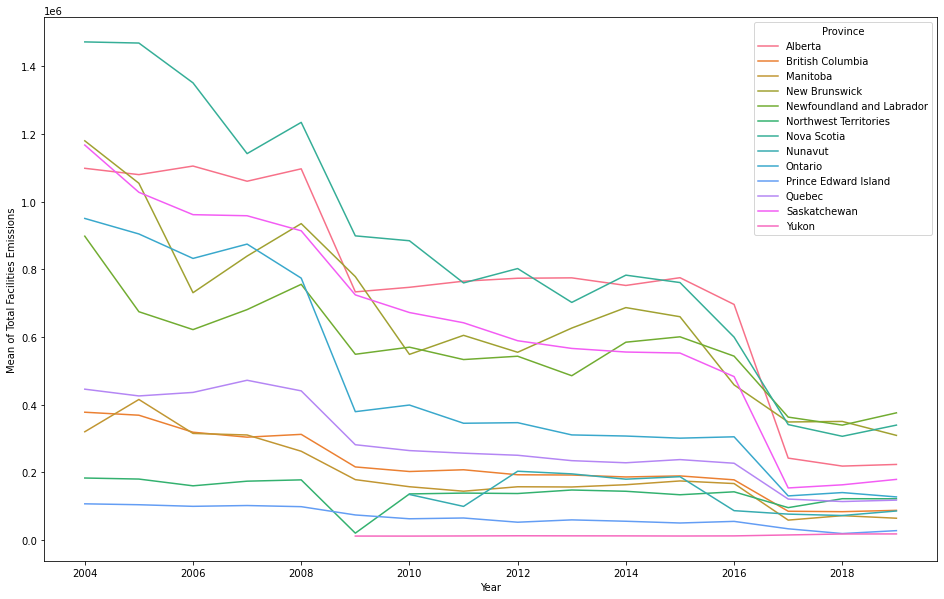

In [29]:
plt.figure(figsize = (16,10))

sns.lineplot(data = gb_mean, x = "Year", y = "Total_Emissions", hue = "Province", ci = None).set(xlabel = "Year", ylabel = "Mean of Total Facilities Emissions")

In [27]:
# gb_p["Post"] = (gb_p["Year"]>2015) * 1
gb_sum["Treatment_Group"] = (gb_sum["Province"] == "Alberta") * 1
gb_mean["Treatment_Group"] = (gb_mean["Province"] == "Alberta") * 1

In [21]:
gb_sum.rename(columns = {"GHG": "Total_Emissions"}, inplace = True)
gb_mean.rename(columns = {"GHG": "Mean_Emissions"}, inplace = True)

# [Group Summations] Empirically Checking Parallel Trends 

In [22]:
gb_sum

,Province,Year,Total_Emissions,Treatment_Group
0,Alberta,2004,1.076723e+08,1
1,Alberta,2005,1.069182e+08,1
2,Alberta,2006,1.138512e+08,1
3,Alberta,2007,1.124090e+08,1
4,Alberta,2008,1.195864e+08,1
...,...,...,...,...
192,Yukon,2015,1.187880e+04,0
193,Yukon,2016,1.221402e+04,0
194,Yukon,2017,3.001392e+04,0
195,Yukon,2018,3.571946e+04,0


In [23]:
gb_test = gb_sum.copy()
gb_test = gb_test.loc[gb_test["Year"]<=2015, :]
gb_test

,Province,Year,Total_Emissions,Treatment_Group
0,Alberta,2004,1.076723e+08,1
1,Alberta,2005,1.069182e+08,1
2,Alberta,2006,1.138512e+08,1
3,Alberta,2007,1.124090e+08,1
4,Alberta,2008,1.195864e+08,1
...,...,...,...,...
188,Yukon,2011,1.204004e+04,0
189,Yukon,2012,1.256706e+04,0
190,Yukon,2013,1.236696e+04,0
191,Yukon,2014,1.223031e+04,0


In [24]:
gb_test = pd.concat([gb_test, pd.get_dummies(gb_test["Year"], drop_first = True, prefix = "is")], axis = 1)
gb_test

,Province,Year,Total_Emissions,Treatment_Group,is_2005,is_2006,is_2007,is_2008,is_2009,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015
0,Alberta,2004,1.076723e+08,1,0,0,0,0,0,0,0,0,0,0,0
1,Alberta,2005,1.069182e+08,1,1,0,0,0,0,0,0,0,0,0,0
2,Alberta,2006,1.138512e+08,1,0,1,0,0,0,0,0,0,0,0,0
3,Alberta,2007,1.124090e+08,1,0,0,1,0,0,0,0,0,0,0,0
4,Alberta,2008,1.195864e+08,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Yukon,2011,1.204004e+04,0,0,0,0,0,0,0,1,0,0,0,0
189,Yukon,2012,1.256706e+04,0,0,0,0,0,0,0,0,1,0,0,0
190,Yukon,2013,1.236696e+04,0,0,0,0,0,0,0,0,0,1,0,0
191,Yukon,2014,1.223031e+04,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
gb_test.columns

Index(['Province', 'Year', 'Total_Emissions', 'Treatment_Group', 'is_2005',
       'is_2006', 'is_2007', 'is_2008', 'is_2009', 'is_2010', 'is_2011',
       'is_2012', 'is_2013', 'is_2014', 'is_2015'],
      dtype='object')

In [26]:
year_list = ['is_2005','is_2006', 'is_2007', 'is_2008', 'is_2009', 'is_2010', 'is_2011', 'is_2012', 'is_2013', 'is_2014', 'is_2015']

"+".join(year_list)

'is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015'

In [27]:
time_interact = ["Treatment_Group * " + x for x in year_list]
"+".join(time_interact)

'Treatment_Group * is_2005+Treatment_Group * is_2006+Treatment_Group * is_2007+Treatment_Group * is_2008+Treatment_Group * is_2009+Treatment_Group * is_2010+Treatment_Group * is_2011+Treatment_Group * is_2012+Treatment_Group * is_2013+Treatment_Group * is_2014+Treatment_Group * is_2015'

In [28]:
interactions = ["(Treatment_Group:" + x + "=0)" for x in year_list]
",".join(interactions)

'(Treatment_Group:is_2005=0),(Treatment_Group:is_2006=0),(Treatment_Group:is_2007=0),(Treatment_Group:is_2008=0),(Treatment_Group:is_2009=0),(Treatment_Group:is_2010=0),(Treatment_Group:is_2011=0),(Treatment_Group:is_2012=0),(Treatment_Group:is_2013=0),(Treatment_Group:is_2014=0),(Treatment_Group:is_2015=0)'

In [29]:
com_trend_test = 'Total_Emissions ~ Treatment_Group + Treatment_Group * is_2005+Treatment_Group * is_2006+Treatment_Group * is_2007+Treatment_Group * is_2008+Treatment_Group * is_2009+Treatment_Group * is_2010+Treatment_Group * is_2011+Treatment_Group * is_2012+Treatment_Group * is_2013+Treatment_Group * is_2014+ Treatment_Group * is_2015'

In [30]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = com_trend_test, data = gb_test)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     18.92
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.33e-30
Time:                        11:17:41   Log-Likelihood:                -2610.9
No. Observations:                 145   AIC:                             5270.
Df Residuals:                     121   BIC:                             5341.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.707e+07   5.53e+06      3.085      0.003    6.11e+06     2.8e+07
Treatment_Group           9.06e+07   1.84e+07      4.936      0.000    5.43e+07    1.27e+08
is_2005                  3.651e+04   7.83e+06      0.005      0.996   -1.55e+07    1.55e+07
Treatment_Group:is_2005 -7.906e+05    2.6e+07     -0.030      0.976   -5.22e+07    5.06e+07
is_2006                 -1.262e+06   7.83e+06     -0.161      0.872   -1.68e+07    1.42e+07
Treatment_Group:is_2006  7.441e+06    2.6e+07      0.287      0.775   -4.39e+07    5.88e+07
is_2007                 -5.793e+05   7.83e+06     -0.074      0.941   -1.61e+07    1.49e+07
Treatment_Group:is_2007  5.316e+06    2.6e+07      0.205      0.838   -4.61e+07    5.67e+07
is_2008                 -1.805e+06   7.83e+06     -0.231      0.818   -1.73e+07    1.37e+07
Treatment_Group:is_2008  1.372e+07    2.6e+07      0.529      0.598   -3.77e+07    6.51e+07
is_2009                 -4.789e+06   7.65e+06     -0.626      0.532   -1.99e+07    1.03e+07
Treatment_Group:is_2009   1.52e+07   2.59e+07      0.587      0.558   -3.61e+07    6.65e+07
is_2010                 -5.364e+06   7.49e+06     -0.716      0.476   -2.02e+07    9.47e+06
Treatment_Group:is_2010  2.094e+07   2.59e+07      0.810      0.420   -3.03e+07    7.21e+07
is_2011                 -6.045e+06   7.49e+06     -0.807      0.421   -2.09e+07    8.79e+06
Treatment_Group:is_2011  2.231e+07   2.59e+07      0.863      0.390   -2.89e+07    7.35e+07
is_2012                 -6.017e+06   7.49e+06     -0.803      0.424   -2.09e+07    8.82e+06
Treatment_Group:is_2012  2.523e+07   2.59e+07      0.976      0.331    -2.6e+07    7.64e+07
is_2013                 -6.345e+06   7.49e+06     -0.847      0.399   -2.12e+07    8.49e+06
Treatment_Group:is_2013  3.118e+07   2.59e+07      1.206      0.230      -2e+07    8.24e+07
is_2014                  -6.67e+06   7.49e+06     -0.890      0.375   -2.15e+07    8.17e+06
Treatment_Group:is_2014   3.82e+07   2.59e+07      1.477      0.142    -1.3e+07    8.94e+07
is_2015                 -6.804e+06   7.49e+06     -0.908      0.366   -2.16e+07    8.03e+06
Treatment_Group:is_2015  4.024e+07   2.59e+07      1.556      0.122    -1.1e+07    9.14e+07
==============================================================================
Omnibus:                       74.625   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.678
Skew:                           2.099   Prob(JB):                     8.11e-51
Kurtosis:                       7.534   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying F test to check if coefficients are different from 0
- Null hypothesis: All dummy interaction terms are 0 
- Alternate hypothesis: At least one dummy interaction term != 0
- We want P > 0.05 to (fail to reject) to illustrate parallel trends

In [31]:
# Testing with F test
hypotheses = "Treatment_Group:is_2005=Treatment_Group:is_2006=Treatment_Group:is_2007=Treatment_Group:is_2008=Treatment_Group:is_2009=Treatment_Group:is_2010=Treatment_Group:is_2011=Treatment_Group:is_2012=Treatment_Group:is_2013=Treatment_Group:is_2014=Treatment_Group:is_2015 = 0"
hypotheses2 = "(Treatment_Group:is_2005=0),(Treatment_Group:is_2006=0),(Treatment_Group:is_2007=0),(Treatment_Group:is_2008=0),(Treatment_Group:is_2009=0),(Treatment_Group:is_2010=0),(Treatment_Group:is_2011=0),(Treatment_Group:is_2012=0),(Treatment_Group:is_2013=0),(Treatment_Group:is_2014=0),(Treatment_Group:is_2015=0)"
res.f_test(hypotheses2)


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.5796548844527294, p=0.8423075169734313, df_denom=121, df_num=11>

# [Group Means] Empirically Checking Parallel Trends

In [32]:
gb_test = gb_mean.copy()
gb_test = gb_test.loc[gb_test["Year"]<=2015, :]
gb_test

,Province,Year,Mean_Emissions,Treatment_Group
0,Alberta,2004,1.098697e+06,1
1,Alberta,2005,1.079982e+06,1
2,Alberta,2006,1.105351e+06,1
3,Alberta,2007,1.060463e+06,1
4,Alberta,2008,1.097123e+06,1
...,...,...,...,...
188,Yukon,2011,1.204004e+04,0
189,Yukon,2012,1.256706e+04,0
190,Yukon,2013,1.236696e+04,0
191,Yukon,2014,1.223031e+04,0


In [33]:
gb_test = pd.concat([gb_test, pd.get_dummies(gb_test["Year"], drop_first = True, prefix = "is")], axis = 1)
gb_test

,Province,Year,Mean_Emissions,Treatment_Group,is_2005,is_2006,is_2007,is_2008,is_2009,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015
0,Alberta,2004,1.098697e+06,1,0,0,0,0,0,0,0,0,0,0,0
1,Alberta,2005,1.079982e+06,1,1,0,0,0,0,0,0,0,0,0,0
2,Alberta,2006,1.105351e+06,1,0,1,0,0,0,0,0,0,0,0,0
3,Alberta,2007,1.060463e+06,1,0,0,1,0,0,0,0,0,0,0,0
4,Alberta,2008,1.097123e+06,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Yukon,2011,1.204004e+04,0,0,0,0,0,0,0,1,0,0,0,0
189,Yukon,2012,1.256706e+04,0,0,0,0,0,0,0,0,1,0,0,0
190,Yukon,2013,1.236696e+04,0,0,0,0,0,0,0,0,0,1,0,0
191,Yukon,2014,1.223031e+04,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
gb_test.columns

Index(['Province', 'Year', 'Mean_Emissions', 'Treatment_Group', 'is_2005',
       'is_2006', 'is_2007', 'is_2008', 'is_2009', 'is_2010', 'is_2011',
       'is_2012', 'is_2013', 'is_2014', 'is_2015'],
      dtype='object')

In [35]:
year_list = ['is_2005','is_2006', 'is_2007', 'is_2008', 'is_2009', 'is_2010', 'is_2011', 'is_2012', 'is_2013', 'is_2014', 'is_2015']

"+".join(year_list)

'is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015'

In [36]:
time_interact = ["Treatment_Group * " + x for x in year_list]
"+".join(time_interact)

'Treatment_Group * is_2005+Treatment_Group * is_2006+Treatment_Group * is_2007+Treatment_Group * is_2008+Treatment_Group * is_2009+Treatment_Group * is_2010+Treatment_Group * is_2011+Treatment_Group * is_2012+Treatment_Group * is_2013+Treatment_Group * is_2014+Treatment_Group * is_2015'

In [37]:
interactions = ["(Treatment_Group:" + x + "=0)" for x in year_list]
",".join(interactions)

'(Treatment_Group:is_2005=0),(Treatment_Group:is_2006=0),(Treatment_Group:is_2007=0),(Treatment_Group:is_2008=0),(Treatment_Group:is_2009=0),(Treatment_Group:is_2010=0),(Treatment_Group:is_2011=0),(Treatment_Group:is_2012=0),(Treatment_Group:is_2013=0),(Treatment_Group:is_2014=0),(Treatment_Group:is_2015=0)'

In [38]:
com_trend_test = 'Mean_Emissions ~ Treatment_Group + Treatment_Group * is_2005+Treatment_Group * is_2006+Treatment_Group * is_2007+Treatment_Group * is_2008+Treatment_Group * is_2009+Treatment_Group * is_2010+Treatment_Group * is_2011+Treatment_Group * is_2012+Treatment_Group * is_2013+Treatment_Group * is_2014+ Treatment_Group * is_2015'

In [39]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = com_trend_test, data = gb_test)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mean_Emissions   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2.250
Date:                Fri, 22 Apr 2022   Prob (F-statistic):            0.00248
Time:                        11:17:42   Log-Likelihood:                -2034.0
No. Observations:                 145   AIC:                             4116.
Df Residuals:                     121   BIC:                             4187.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                7.102e+05   1.04e+05      6.859      0.000    5.05e+05    9.15e+05
Treatment_Group          3.885e+05   3.43e+05      1.131      0.260   -2.91e+05    1.07e+06
is_2005                 -4.768e+04   1.46e+05     -0.326      0.745   -3.38e+05    2.42e+05
Treatment_Group:is_2005  2.897e+04   4.86e+05      0.060      0.953   -9.33e+05     9.9e+05
is_2006                 -1.274e+05   1.46e+05     -0.870      0.386   -4.17e+05    1.62e+05
Treatment_Group:is_2006  1.341e+05   4.86e+05      0.276      0.783   -8.27e+05     1.1e+06
is_2007                 -1.244e+05   1.46e+05     -0.849      0.397   -4.14e+05    1.66e+05
Treatment_Group:is_2007  8.616e+04   4.86e+05      0.177      0.859   -8.75e+05    1.05e+06
is_2008                 -1.197e+05   1.46e+05     -0.817      0.415    -4.1e+05     1.7e+05
Treatment_Group:is_2008  1.181e+05   4.86e+05      0.243      0.808   -8.43e+05    1.08e+06
is_2009                 -3.363e+05   1.43e+05     -2.351      0.020    -6.2e+05   -5.31e+04
Treatment_Group:is_2009 -2.892e+04   4.85e+05     -0.060      0.953   -9.88e+05    9.31e+05
is_2010                 -3.732e+05    1.4e+05     -2.662      0.009   -6.51e+05   -9.56e+04
Treatment_Group:is_2010  2.146e+04   4.84e+05      0.044      0.965   -9.36e+05    9.79e+05
is_2011                 -3.927e+05    1.4e+05     -2.801      0.006    -6.7e+05   -1.15e+05
Treatment_Group:is_2011  5.908e+04   4.84e+05      0.122      0.903   -8.99e+05    1.02e+06
is_2012                 -3.899e+05    1.4e+05     -2.781      0.006   -6.67e+05   -1.12e+05
Treatment_Group:is_2012  6.496e+04   4.84e+05      0.134      0.893   -8.93e+05    1.02e+06
is_2013                 -4.027e+05    1.4e+05     -2.872      0.005    -6.8e+05   -1.25e+05
Treatment_Group:is_2013   7.89e+04   4.84e+05      0.163      0.871   -8.79e+05    1.04e+06
is_2014                 -3.863e+05    1.4e+05     -2.755      0.007   -6.64e+05   -1.09e+05
Treatment_Group:is_2014  3.999e+04   4.84e+05      0.083      0.934   -9.18e+05    9.98e+05
is_2015                 -3.885e+05    1.4e+05     -2.771      0.006   -6.66e+05   -1.11e+05
Treatment_Group:is_2015  6.516e+04   4.84e+05      0.135      0.893   -8.93e+05    1.02e+06
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.495
Skew:                           0.424   Prob(JB):                       0.0641
Kurtosis:                       2.565   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying F test to check if coefficients are different from 0
- Null hypothesis: All dummy interaction terms are 0 
- Alternate hypothesis: At least one dummy interaction term != 0
- We want P > 0.05 to (fail to reject) to illustrate parallel trends

In [40]:
# Testing with F test
hypotheses = "Treatment_Group:is_2005=Treatment_Group:is_2006=Treatment_Group:is_2007=Treatment_Group:is_2008=Treatment_Group:is_2009=Treatment_Group:is_2010=Treatment_Group:is_2011=Treatment_Group:is_2012=Treatment_Group:is_2013=Treatment_Group:is_2014=Treatment_Group:is_2015 = 0"
hypotheses2 = "(Treatment_Group:is_2005=0),(Treatment_Group:is_2006=0),(Treatment_Group:is_2007=0),(Treatment_Group:is_2008=0),(Treatment_Group:is_2009=0),(Treatment_Group:is_2010=0),(Treatment_Group:is_2011=0),(Treatment_Group:is_2012=0),(Treatment_Group:is_2013=0),(Treatment_Group:is_2014=0),(Treatment_Group:is_2015=0)"
res.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.0186356367678039, p=0.9999999860318799, df_denom=121, df_num=11>

# [Group Summation] Classic DD(2015 Climate Leadership Plan)

In [41]:
gb_sum["Post"] = (gb_sum["Year"]>2015) * 1
gb_sum

,Province,Year,Total_Emissions,Treatment_Group,Post
0,Alberta,2004,1.076723e+08,1,0
1,Alberta,2005,1.069182e+08,1,0
2,Alberta,2006,1.138512e+08,1,0
3,Alberta,2007,1.124090e+08,1,0
4,Alberta,2008,1.195864e+08,1,0
...,...,...,...,...,...
192,Yukon,2015,1.187880e+04,0,0
193,Yukon,2016,1.221402e+04,0,1
194,Yukon,2017,3.001392e+04,0,1
195,Yukon,2018,3.571946e+04,0,1


In [42]:
model = 'Total_Emissions ~ Treatment_Group + Post + Treatment_Group * Post'

In [43]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = model, data = gb_sum)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     275.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.02e-69
Time:                        11:17:42   Log-Likelihood:                -3542.4
No. Observations:                 197   AIC:                             7093.
Df Residuals:                     193   BIC:                             7106.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.304e+07   1.37e+06      9.542      0.000    1.03e+07    1.57e+07
Treatment_Group       1.091e+08   4.75e+06     22.954      0.000    9.97e+07    1.18e+08
Post                 -1.983e+06   2.65e+06     -0.747      0.456   -7.22e+06    3.25e+06
Treatment_Group:Post   3.26e+07   9.48e+06      3.438      0.001    1.39e+07    5.13e+07
==============================================================================
Omnibus:                       93.627   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.198
Skew:                           2.025   Prob(JB):                     1.96e-67
Kurtosis:                       7.584   Cond. No.                         9.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# [Group Summations] Model Building with Province Fixed Effects and Time

In [44]:
gb_sum = pd.concat([gb_sum, pd.get_dummies(gb_sum["Province"], drop_first = True, prefix = "is")], axis = 1)
gb_sum = pd.concat([gb_sum, pd.get_dummies(gb_sum["Year"], drop_first = True, prefix = "is")], axis = 1)
# gb_sum.drop(columns = ["Post"],inplace=True)
gb_sum.columns = gb_sum.columns.str.replace(" ", "")

gb_sum.head()

,Province,Year,Total_Emissions,Treatment_Group,Post,is_BritishColumbia,is_Manitoba,is_NewBrunswick,is_NewfoundlandandLabrador,is_NorthwestTerritories,...,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_2019
0,Alberta,2004,1.076723e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alberta,2005,1.069182e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alberta,2006,1.138512e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alberta,2007,1.124090e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alberta,2008,1.195864e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
formula_line = "Total_Emissions ~ Treatment_Group+" + "+".join(gb_sum.columns[4:])
formula_line

'Total_Emissions ~ Treatment_Group+Post+is_BritishColumbia+is_Manitoba+is_NewBrunswick+is_NewfoundlandandLabrador+is_NorthwestTerritories+is_NovaScotia+is_Nunavut+is_Ontario+is_PrinceEdwardIsland+is_Quebec+is_Saskatchewan+is_Yukon+is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015+is_2016+is_2017+is_2018+is_2019'

In [46]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = formula_line, data = gb_sum)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.63e-115
Time:                        11:17:43   Log-Likelihood:                -3357.6
No. Observations:                 197   AIC:                             6771.
Df Residuals:                     169   BIC:                             6863.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.002e+07   1.86e+06     10.767      0.000    1.63e+07    2.37e+07
Treatment_Group             1.104e+08   1.59e+06     69.290      0.000    1.07e+08    1.14e+08
Post                        3.217e+05   1.76e+06      0.183      0.855   -3.15e+06     3.8e+06
is_BritishColumbia         -4.919e+06   1.59e+06     -3.087      0.002   -8.06e+06   -1.77e+06
is_Manitoba                -1.709e+07   1.59e+06    -10.725      0.000   -2.02e+07   -1.39e+07
is_NewBrunswick            -1.052e+07   1.59e+06     -6.604      0.000   -1.37e+07   -7.38e+06
is_NewfoundlandandLabrador -1.435e+07   1.59e+06     -9.004      0.000   -1.75e+07   -1.12e+07
is_NorthwestTerritories    -1.883e+07   1.59e+06    -11.816      0.000    -2.2e+07   -1.57e+07
is_NovaScotia              -9.884e+06   1.59e+06     -6.203      0.000    -1.3e+07   -6.74e+06
is_Nunavut                 -1.903e+07   2.02e+06     -9.421      0.000    -2.3e+07    -1.5e+07
is_Ontario                  3.565e+07   1.59e+06     22.372      0.000    3.25e+07    3.88e+07
is_PrinceEdwardIsland      -1.928e+07   1.59e+06    -12.101      0.000   -2.24e+07   -1.61e+07
is_Quebec                   2.119e+06   1.59e+06      1.330      0.185   -1.03e+06    5.26e+06
is_Saskatchewan             4.901e+06   1.59e+06      3.076      0.002    1.76e+06    8.05e+06
is_Yukon                   -1.916e+07   1.93e+06     -9.945      0.000    -2.3e+07   -1.54e+07
is_2005                    -3.537e+04   2.81e+06     -0.013      0.990   -5.58e+06    5.51e+06
is_2006                    -5.859e+05   2.81e+06     -0.208      0.835   -6.13e+06    4.96e+06
is_2007                    -9.602e+04   2.81e+06     -0.034      0.973   -5.65e+06    5.45e+06
is_2008                    -5.575e+05   2.81e+06     -0.198      0.843   -6.11e+06    4.99e+06
is_2009                     -2.17e+06   2.76e+06     -0.787      0.432   -7.61e+06    3.27e+06
is_2010                    -1.268e+06   2.71e+06     -0.468      0.641   -6.62e+06    4.08e+06
is_2011                    -1.844e+06   2.71e+06     -0.680      0.497    -7.2e+06    3.51e+06
is_2012                    -1.591e+06   2.71e+06     -0.587      0.558   -6.94e+06    3.76e+06
is_2013                    -1.462e+06   2.71e+06     -0.539      0.591   -6.81e+06    3.89e+06
is_2014                    -1.247e+06   2.71e+06     -0.460      0.646    -6.6e+06    4.11e+06
is_2015                    -1.223e+06   2.71e+06     -0.451      0.652   -6.58e+06    4.13e+06
is_2016                    -1.565e+06   1.64e+06     -0.953      0.342   -4.81e+06    1.68e+06
is_2017                     6.643e+05   1.64e+06      0.404      0.687   -2.58e+06    3.91e+06
is_2018                     7.157e+05   1.64e+06      0.435      0.664   -2.53e+06    3.96e+06
is_2019                     5.072e+05   1.6

# [Group Means] Classic DD

In [47]:
gb_mean["Post"] = (gb_mean["Year"]>2015) * 1
gb_mean

,Province,Year,Mean_Emissions,Treatment_Group,Post
0,Alberta,2004,1.098697e+06,1,0
1,Alberta,2005,1.079982e+06,1,0
2,Alberta,2006,1.105351e+06,1,0
3,Alberta,2007,1.060463e+06,1,0
4,Alberta,2008,1.097123e+06,1,0
...,...,...,...,...,...
192,Yukon,2015,1.187880e+04,0,0
193,Yukon,2016,1.221402e+04,0,1
194,Yukon,2017,1.500696e+04,0,1
195,Yukon,2018,1.785973e+04,0,1


In [48]:
model = 'Mean_Emissions ~ Treatment_Group + Post + Treatment_Group * Post'

In [49]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = model, data = gb_mean)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mean_Emissions   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     20.16
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.09e-11
Time:                        11:17:43   Log-Likelihood:                -2762.5
No. Observations:                 197   AIC:                             5533.
Df Residuals:                     193   BIC:                             5546.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.404e+05   2.61e+04     16.884      0.000    3.89e+05    4.92e+05
Treatment_Group       4.566e+05   9.07e+04      5.036      0.000    2.78e+05    6.35e+05
Post                 -2.583e+05   5.06e+04     -5.100      0.000   -3.58e+05   -1.58e+05
Treatment_Group:Post -2.936e+05   1.81e+05     -1.623      0.106    -6.5e+05    6.32e+04
==============================================================================
Omnibus:                       28.194   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.559
Skew:                           0.958   Prob(JB):                     1.90e-08
Kurtosis:                       3.814   Cond. No.                         9.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# [Group Means] Model Building with Province Fixed Effects (2015 Climate Leadership Plan) 

In [50]:
gb_mean = pd.concat([gb_mean, pd.get_dummies(gb_mean["Province"], drop_first = True, prefix = "is")], axis = 1)
gb_mean = pd.concat([gb_mean, pd.get_dummies(gb_mean["Year"], drop_first = True, prefix = "is")], axis = 1)
# gb_mean.drop(columns = ["Post"],inplace=True)
gb_mean.columns = gb_mean.columns.str.replace(" ", "")

gb_mean

,Province,Year,Mean_Emissions,Treatment_Group,Post,is_BritishColumbia,is_Manitoba,is_NewBrunswick,is_NewfoundlandandLabrador,is_NorthwestTerritories,...,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_2019
0,Alberta,2004,1.098697e+06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alberta,2005,1.079982e+06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alberta,2006,1.105351e+06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alberta,2007,1.060463e+06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alberta,2008,1.097123e+06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Yukon,2015,1.187880e+04,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
193,Yukon,2016,1.221402e+04,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194,Yukon,2017,1.500696e+04,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
195,Yukon,2018,1.785973e+04,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
formula_line2 = "Mean_Emissions ~ Treatment_Group+" + "+".join(gb_mean.columns[4:])
formula_line2

'Mean_Emissions ~ Treatment_Group+Post+is_BritishColumbia+is_Manitoba+is_NewBrunswick+is_NewfoundlandandLabrador+is_NorthwestTerritories+is_NovaScotia+is_Nunavut+is_Ontario+is_PrinceEdwardIsland+is_Quebec+is_Saskatchewan+is_Yukon+is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015+is_2016+is_2017+is_2018+is_2019'

In [52]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = formula_line2, data = gb_mean)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mean_Emissions   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     44.50
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.59e-63
Time:                        11:17:44   Log-Likelihood:                -2583.2
No. Observations:                 197   AIC:                             5222.
Df Residuals:                     169   BIC:                             5314.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   6.547e+05   3.65e+04     17.947      0.000    5.83e+05    7.27e+05
Treatment_Group             4.068e+05   3.13e+04     13.011      0.000    3.45e+05    4.69e+05
Post                       -4.083e+05   3.45e+04    -11.820      0.000   -4.77e+05    -3.4e+05
is_BritishColumbia         -1.332e+05   3.13e+04     -4.262      0.000   -1.95e+05   -7.15e+04
is_Manitoba                -1.573e+05   3.13e+04     -5.031      0.000   -2.19e+05   -9.56e+04
is_NewBrunswick             3.145e+05   3.13e+04     10.060      0.000    2.53e+05    3.76e+05
is_NewfoundlandandLabrador  2.178e+05   3.13e+04      6.967      0.000    1.56e+05     2.8e+05
is_NorthwestTerritories    -2.137e+05   3.13e+04     -6.834      0.000   -2.75e+05   -1.52e+05
is_NovaScotia               5.133e+05   3.13e+04     16.418      0.000    4.52e+05    5.75e+05
is_Nunavut                 -1.086e+05   3.96e+04     -2.740      0.007   -1.87e+05   -3.03e+04
is_Ontario                  1.121e+05   3.13e+04      3.586      0.000    5.04e+04    1.74e+05
is_PrinceEdwardIsland      -2.855e+05   3.13e+04     -9.132      0.000   -3.47e+05   -2.24e+05
is_Quebec                  -6.752e+04   3.13e+04     -2.160      0.032   -1.29e+05   -5801.751
is_Saskatchewan             2.923e+05   3.13e+04      9.348      0.000    2.31e+05    3.54e+05
is_Yukon                   -2.364e+05   3.78e+04     -6.252      0.000   -3.11e+05   -1.62e+05
is_2005                    -4.505e+04   5.52e+04     -0.817      0.415   -1.54e+05    6.38e+04
is_2006                    -1.152e+05   5.52e+04     -2.089      0.038   -2.24e+05   -6347.095
is_2007                    -1.166e+05   5.52e+04     -2.113      0.036   -2.25e+05   -7684.347
is_2008                    -1.089e+05   5.52e+04     -1.975      0.050   -2.18e+05     -51.218
is_2009                    -3.144e+05   5.41e+04     -5.812      0.000   -4.21e+05   -2.08e+05
is_2010                    -3.364e+05   5.32e+04     -6.324      0.000   -4.41e+05   -2.31e+05
is_2011                    -3.531e+05   5.32e+04     -6.638      0.000   -4.58e+05   -2.48e+05
is_2012                    -3.499e+05   5.32e+04     -6.576      0.000   -4.55e+05   -2.45e+05
is_2013                    -3.615e+05   5.32e+04     -6.796      0.000   -4.67e+05   -2.57e+05
is_2014                    -3.481e+05   5.32e+04     -6.543      0.000   -4.53e+05   -2.43e+05
is_2015                    -3.484e+05   5.32e+04     -6.549      0.000   -4.53e+05   -2.43e+05
is_2016                     7523.2393   3.22e+04      0.233      0.816   -5.61e+04    7.12e+04
is_2017                    -1.378e+05   3.22e+04     -4.273      0.000   -2.01e+05   -7.41e+04
is_2018                    -1.413e+05   3.22e+04     -4.382      0.000   -2.05e+05   -7.76e+04
is_2019                    -1.368e+05   3.2

# Group by District

In [53]:
df

,ID,Year,GHG,Type,Province,District
0,G10001,2019,8.756040e+04,Mechanical pulp mills,Quebec,Alma
1,G10003,2019,4.145773e+05,Pipeline transportation of natural gas,Alberta,Airdrie
2,G10004,2019,9.886037e+02,Fossil-fuel electric power generation,Ontario,Bath
3,G10006,2019,1.241089e+06,Chemical fertilizer (except potash) manufacturing,Alberta,Sturgeon County
4,G10007,2019,2.676638e+05,Petrochemical manufacturing,Alberta,Edmonton
...,...,...,...,...,...,...
11326,G10323,2004,1.787137e+05,Fossil-Fuel Electric Power Generation,Ontario,Windsor
11327,G10324,2004,1.455941e+06,Non-Conventional Oil Extraction,Alberta,Bonnyville
11328,G10325,2004,1.037091e+05,Glass Manufacturing,Ontario,Owen Sound
11329,G10326,2004,1.381902e+05,Conventional Oil and Gas Extraction,Alberta,Zama City


In [54]:
dis_gb_sum = df.groupby(["District", "Year", "Province"]).sum().reset_index()
dis_gb_mean = df.groupby(["District", "Year", "Province"]).mean().reset_index()

In [55]:
dis_gb_sum["Treatment_Group"] = (dis_gb_sum["Province"] == "Alberta") * 1
dis_gb_mean["Treatment_Group"] = (dis_gb_mean["Province"] == "Alberta") * 1

In [56]:
dis_gb_sum.rename(columns = {"GHG": "Total_Emissions"}, inplace = True)
dis_gb_mean.rename(columns = {"GHG": "Mean_Emissions"}, inplace = True)

# [Group Summations]

In [57]:
dis_gb_sum = pd.concat([dis_gb_sum, pd.get_dummies(dis_gb_sum["Province"], drop_first = True, prefix = "is")], axis = 1)
dis_gb_sum = pd.concat([dis_gb_sum, pd.get_dummies(dis_gb_sum["Year"], drop_first = True, prefix = "is")], axis = 1)
# gb_mean.drop(columns = ["Post"],inplace=True)
dis_gb_sum.columns = dis_gb_sum.columns.str.replace(" ", "")

dis_gb_sum

,District,Year,Province,Total_Emissions,Treatment_Group,is_BritishColumbia,is_Manitoba,is_NewBrunswick,is_NewfoundlandandLabrador,is_NorthwestTerritories,...,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_2019
0,-,2018,Saskatchewan,7.340171e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-,2019,Saskatchewan,5.284526e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22 km NE of Fort McMurray,2004,Alberta,8.670778e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22 km NE of Fort McMurray,2005,Alberta,7.767412e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22 km NE of Fort McMurray,2006,Alberta,9.204226e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,onion lake,2016,Saskatchewan,7.629595e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5723,onion lake,2017,Saskatchewan,1.496667e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5724,onion lake,2018,Saskatchewan,1.511821e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5725,onion lake,2019,Saskatchewan,3.191950e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
formula_line3 = "Total_Emissions ~ Treatment_Group+" + "+".join(dis_gb_sum.columns[4:])
formula_line3

'Total_Emissions ~ Treatment_Group+Treatment_Group+is_BritishColumbia+is_Manitoba+is_NewBrunswick+is_NewfoundlandandLabrador+is_NorthwestTerritories+is_NovaScotia+is_Nunavut+is_Ontario+is_PrinceEdwardIsland+is_Quebec+is_Saskatchewan+is_Yukon+is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015+is_2016+is_2017+is_2018+is_2019'

In [59]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = formula_line3, data = dis_gb_sum)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     11.48
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.27e-48
Time:                        11:17:45   Log-Likelihood:                -91737.
No. Observations:                5727   AIC:                         1.835e+05
Df Residuals:                    5699   BIC:                         1.837e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   9.778e+05   1.54e+05      6.331      0.000    6.75e+05    1.28e+06
Treatment_Group             9.259e+05   8.91e+04     10.397      0.000    7.51e+05     1.1e+06
is_BritishColumbia         -1.359e+05   1.06e+05     -1.284      0.199   -3.43e+05    7.15e+04
is_Manitoba                -1.731e+05   1.78e+05     -0.972      0.331   -5.22e+05    1.76e+05
is_NewBrunswick             5.353e+05   1.88e+05      2.855      0.004    1.68e+05    9.03e+05
is_NewfoundlandandLabrador  1.527e+05      2e+05      0.764      0.445   -2.39e+05    5.45e+05
is_NorthwestTerritories    -4.071e+05   2.53e+05     -1.608      0.108   -9.03e+05    8.91e+04
is_NovaScotia               3.564e+05   1.66e+05      2.147      0.032     3.1e+04    6.82e+05
is_Nunavut                 -1.386e+05   4.22e+05     -0.329      0.742   -9.65e+05    6.88e+05
is_Ontario                  2.105e+05   9.15e+04      2.300      0.021    3.11e+04     3.9e+05
is_PrinceEdwardIsland      -3.913e+05   4.49e+05     -0.871      0.384   -1.27e+06     4.9e+05
is_Quebec                  -9.616e+04   9.67e+04     -0.994      0.320   -2.86e+05    9.34e+04
is_Saskatchewan             4.575e+05   1.19e+05      3.848      0.000    2.24e+05    6.91e+05
is_Yukon                   -3.184e+05   5.48e+05     -0.581      0.561   -1.39e+06    7.56e+05
is_2005                    -5059.4497   2.12e+05     -0.024      0.981    -4.2e+05     4.1e+05
is_2006                    -7.614e+04    2.1e+05     -0.362      0.717   -4.88e+05    3.36e+05
is_2007                    -6.269e+04   2.09e+05     -0.299      0.765   -4.73e+05    3.48e+05
is_2008                    -8.217e+04   2.09e+05     -0.392      0.695   -4.93e+05    3.28e+05
is_2009                     -4.04e+05   1.96e+05     -2.066      0.039   -7.87e+05   -2.06e+04
is_2010                    -4.412e+05   1.94e+05     -2.278      0.023   -8.21e+05   -6.15e+04
is_2011                    -4.441e+05   1.94e+05     -2.292      0.022   -8.24e+05   -6.43e+04
is_2012                    -4.502e+05   1.93e+05     -2.327      0.020    -8.3e+05   -7.09e+04
is_2013                    -4.925e+05   1.92e+05     -2.570      0.010   -8.68e+05   -1.17e+05
is_2014                    -4.822e+05   1.92e+05     -2.510      0.012   -8.59e+05   -1.06e+05
is_2015                    -4.561e+05   1.93e+05     -2.363      0.018   -8.35e+05   -7.77e+04
is_2016                    -5.613e+05   1.89e+05     -2.964      0.003   -9.32e+05    -1.9e+05
is_2017                    -8.588e+05   1.73e+05     -4.978      0.000    -1.2e+06   -5.21e+05
is_2018                    -8.993e+05   1.72e+05     -5.243      0.000   -1.24e+06   -5.63e+05
is_2019                    -8.925e+05   1.72e+05     -5.200      0.000   -1.23e+06   -5.56e+05
===========================================

# [Group Means] 

In [60]:
dis_gb_mean = pd.concat([dis_gb_mean, pd.get_dummies(dis_gb_mean["Province"], drop_first = True, prefix = "is")], axis = 1)
dis_gb_mean = pd.concat([dis_gb_mean, pd.get_dummies(dis_gb_mean["Year"], drop_first = True, prefix = "is")], axis = 1)
# gb_mean.drop(columns = ["Post"],inplace=True)
dis_gb_mean.columns = dis_gb_mean.columns.str.replace(" ", "")
dis_gb_mean
dis_gb_mean

,District,Year,Province,Mean_Emissions,Treatment_Group,is_BritishColumbia,is_Manitoba,is_NewBrunswick,is_NewfoundlandandLabrador,is_NorthwestTerritories,...,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_2019
0,-,2018,Saskatchewan,3.670085e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-,2019,Saskatchewan,5.284526e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22 km NE of Fort McMurray,2004,Alberta,8.670778e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22 km NE of Fort McMurray,2005,Alberta,7.767412e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22 km NE of Fort McMurray,2006,Alberta,9.204226e+06,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,onion lake,2016,Saskatchewan,7.629595e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5723,onion lake,2017,Saskatchewan,1.496667e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5724,onion lake,2018,Saskatchewan,1.511821e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5725,onion lake,2019,Saskatchewan,3.191950e+05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
formula_line4 = "Mean_Emissions ~ Treatment_Group+" + "+".join(dis_gb_sum.columns[4:])
formula_line4

'Mean_Emissions ~ Treatment_Group+Treatment_Group+is_BritishColumbia+is_Manitoba+is_NewBrunswick+is_NewfoundlandandLabrador+is_NorthwestTerritories+is_NovaScotia+is_Nunavut+is_Ontario+is_PrinceEdwardIsland+is_Quebec+is_Saskatchewan+is_Yukon+is_2005+is_2006+is_2007+is_2008+is_2009+is_2010+is_2011+is_2012+is_2013+is_2014+is_2015+is_2016+is_2017+is_2018+is_2019'

In [62]:
import statsmodels.formula.api as smf
mod = smf.ols(formula = formula_line4, data = dis_gb_mean)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mean_Emissions   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     17.88
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.49e-81
Time:                        11:17:45   Log-Likelihood:                -87008.
No. Observations:                5727   AIC:                         1.741e+05
Df Residuals:                    5699   BIC:                         1.743e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   6.551e+05   6.76e+04      9.687      0.000    5.23e+05    7.88e+05
Treatment_Group             3.982e+05    3.9e+04     10.210      0.000    3.22e+05    4.75e+05
is_BritishColumbia         -9.429e+04   4.63e+04     -2.035      0.042   -1.85e+05   -3475.441
is_Manitoba                -1.079e+05    7.8e+04     -1.383      0.167   -2.61e+05     4.5e+04
is_NewBrunswick             1.103e+05   8.21e+04      1.344      0.179   -5.06e+04    2.71e+05
is_NewfoundlandandLabrador  2.408e+05   8.76e+04      2.750      0.006    6.92e+04    4.13e+05
is_NorthwestTerritories    -2.224e+05   1.11e+05     -2.007      0.045    -4.4e+05   -5124.049
is_NovaScotia               4.855e+05   7.27e+04      6.679      0.000    3.43e+05    6.28e+05
is_Nunavut                 -3.366e+04   1.85e+05     -0.182      0.855   -3.96e+05    3.28e+05
is_Ontario                  6.405e+04   4.01e+04      1.598      0.110   -1.45e+04    1.43e+05
is_PrinceEdwardIsland      -2.109e+05   1.97e+05     -1.071      0.284   -5.97e+05    1.75e+05
is_Quebec                  -1.224e+04   4.23e+04     -0.289      0.773   -9.53e+04    7.08e+04
is_Saskatchewan             2.069e+05   5.21e+04      3.974      0.000    1.05e+05    3.09e+05
is_Yukon                   -1.694e+05    2.4e+05     -0.705      0.481    -6.4e+05    3.01e+05
is_2005                    -2.553e+04   9.27e+04     -0.275      0.783   -2.07e+05    1.56e+05
is_2006                    -6.796e+04    9.2e+04     -0.739      0.460   -2.48e+05    1.12e+05
is_2007                    -6.602e+04   9.17e+04     -0.720      0.471   -2.46e+05    1.14e+05
is_2008                    -9.814e+04   9.17e+04     -1.070      0.284   -2.78e+05    8.16e+04
is_2009                    -3.279e+05   8.57e+04     -3.828      0.000   -4.96e+05    -1.6e+05
is_2010                    -3.685e+05   8.48e+04     -4.343      0.000   -5.35e+05   -2.02e+05
is_2011                    -3.581e+05   8.48e+04     -4.220      0.000   -5.24e+05   -1.92e+05
is_2012                    -3.565e+05   8.47e+04     -4.207      0.000   -5.23e+05    -1.9e+05
is_2013                    -3.647e+05   8.39e+04     -4.346      0.000   -5.29e+05      -2e+05
is_2014                    -3.635e+05   8.41e+04     -4.321      0.000   -5.28e+05   -1.99e+05
is_2015                    -3.478e+05   8.45e+04     -4.114      0.000   -5.13e+05   -1.82e+05
is_2016                    -3.957e+05   8.29e+04     -4.772      0.000   -5.58e+05   -2.33e+05
is_2017                    -6.087e+05   7.55e+04     -8.058      0.000   -7.57e+05   -4.61e+05
is_2018                    -6.285e+05   7.51e+04     -8.367      0.000   -7.76e+05   -4.81e+05
is_2019                    -6.226e+05   7.52e+04     -8.284      0.000    -7.7e+05   -4.75e+05
===========================================